# Proyek Analisis Data: [E-commerce]
- **Nama:** Zeva Lorensia Naibaho
- **Email:** zeva.22072@mhs.unesa.ac.id
- **ID Dicoding:** zevanaibaho

## Menentukan Pertanyaan Bisnis


### Pertanyaan 1
Produk apa yang paling laris setiap tahunnya?

### Pertanyaan 2
Metode pembayaran apa yang paling sering digunakan pelanggan, dan berapa
rata-rata nilai pesanan untuk setiap jenis pembayaran?

### Pertanyaan 3
Bagaimana rata-rata skor ulasan untuk kategori produk terlaris berdasarkan penjualan di tahun 2016, 2017, dan 2018?


### Pertanyaan 4
Berapa jumlah total pesanan tiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
import plotly.express as px

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

###  Gathering Data

In [6]:
file_path = '/content/drive/My Drive/E-Commerce Public Dataset/orders_dataset.csv'
orders_df = pd.read_csv(file_path)
print(orders_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [7]:
file_path = '/content/drive/My Drive/E-Commerce Public Dataset/products_dataset.csv'
product_df = pd.read_csv(file_path)
print(product_df.head())

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

In [8]:
file_path = '/content/drive/My Drive/E-Commerce Public Dataset/order_reviews_dataset.csv'
order_reviews_df = pd.read_csv(file_path)
print(order_reviews_df.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

In [9]:
file_path = '/content/drive/My Drive/E-Commerce Public Dataset/order_items_dataset.csv'
order_items_df = pd.read_csv(file_path)
print(order_items_df.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [10]:
file_path = '/content/drive/My Drive/E-Commerce Public Dataset/order_payments_dataset.csv'
order_payment_df = pd.read_csv(file_path)
print(order_payment_df.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


Insight
*    
Tren Pertumbuhan Pesanan: Menganalisis jumlah total pesanan per tahun membantu memahami tren pertumbuhan penjualan. Jika jumlah pesanan meningkat dari tahun ke tahun, ini menunjukkan pertumbuhan bisnis yang positif.
*   Perencanaan Strategis: Data ini dapat digunakan untuk perencanaan sumber daya dan strategi pemasaran yang lebih baik, karena pemahaman tentang volume pesanan dapat membantu dalam pengelolaan inventaris dan penentuan target penjualan.


### Assesing Data

Menilai tabel orders

In [11]:
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
missing_values = orders_df.isna().sum()
print("Jumlah nilai yang hilang di setiap kolom:\n", missing_values)


Jumlah nilai yang hilang di setiap kolom:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [13]:
duplicate_count = orders_df.duplicated().sum()
print("Jumlah duplikasi pada value:", duplicate_count)


Jumlah duplikasi pada value: 0


Menilai tabel product

In [14]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
missing_values = product_df.isna().sum()
print("Jumlah nilai yang hilang di setiap kolom:\n", missing_values)


Jumlah nilai yang hilang di setiap kolom:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [16]:
duplicate_count = product_df.duplicated().sum()
print("Jumlah duplikasi pada value:", duplicate_count)

Jumlah duplikasi pada value: 0


Menilai Tabel Order_reviews



In [17]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [18]:
missing_values = order_reviews_df.isna().sum()
print("Jumlah nilai yang hilang di setiap kolom:\n", missing_values)

Jumlah nilai yang hilang di setiap kolom:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [19]:
duplicate_count = order_reviews_df.duplicated().sum()
print("Jumlah duplikasi pada value:", duplicate_count)

Jumlah duplikasi pada value: 0


Menilai Tabel Order_item

In [20]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
missing_values = order_items_df.isna().sum()
print("Jumlah nilai yang hilang di setiap kolom:\n", missing_values)

Jumlah nilai yang hilang di setiap kolom:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [22]:
duplicate_count = order_items_df.duplicated().sum()
print("Jumlah duplikasi pada value:", duplicate_count)

Jumlah duplikasi pada value: 0


Menilai Tabel Order_payment

In [23]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
missing_values = order_payment_df.isna().sum()
print("Jumlah nilai yang hilang di setiap kolom:\n", missing_values)

Jumlah nilai yang hilang di setiap kolom:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [25]:
duplicate_count = order_payment_df.duplicated().sum()
print("Jumlah duplikasi pada value:", duplicate_count)

Jumlah duplikasi pada value: 0


Insight

*   Terdapat beberapa kolom dengan nilai hilang di semua tabel, yang dapat memengaruhi analisis. Tabel orders_df menunjukkan nilai hilang di kolom yang berkaitan dengan pengiriman, sedangkan tabel product_df menunjukkan nilai hilang di kolom kategori dan deskripsi produk.
*  Tidak ada duplikasi yang terdeteksi di semua tabel, menunjukkan bahwa data yang ada adalah unik dan konsisten.



### Cleaning data

In [26]:
#tabel orders
orders_df.dropna(inplace=True)  # Menghapus baris dengan nilai hilang
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])  # Mengubah tipe data
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

#tabel product
product_df.loc[:, 'product_weight_g'] = product_df['product_weight_g'].fillna(product_df['product_weight_g'].median())
product_df.loc[:, 'product_length_cm'] = product_df['product_length_cm'].fillna(product_df['product_length_cm'].median())
product_df.loc[:, 'product_height_cm'] = product_df['product_height_cm'].fillna(product_df['product_height_cm'].median())
product_df.loc[:, 'product_width_cm'] = product_df['product_width_cm'].fillna(product_df['product_width_cm'].median())

#tabel order_reviews
order_reviews_df.dropna(subset=['review_comment_title', 'review_comment_message'], inplace=True)  # Menghapus baris yang hilang pada kolom penting
order_reviews_df['review_score'] = order_reviews_df['review_score'].astype(int)  # Memastikan tipe data

#tabel order_payment
order_payment_df['payment_type'] = order_payment_df['payment_type'].astype(str)  # Memastikan tipe data

# Menghapus duplikasi (meskipun Anda sudah memastikan tidak ada duplikasi)
orders_df.drop_duplicates(inplace=True)
product_df.drop_duplicates(inplace=True)
order_reviews_df.drop_duplicates(inplace=True)
order_items_df.drop_duplicates(inplace=True)
order_payment_df.drop_duplicates(inplace=True)

print("Cleaning completed.")

Cleaning completed.


Insight
*  Beberapa kolom di berbagai tabel memiliki nilai yang hilang. Ini perlu diperhatikan karena data yang hilang dapat mempengaruhi analisis lebih lanjut, seperti dalam mencari produk terlaris, metode pembayaran yang paling sering digunakan, distribusi skor ulasan, serta total pesanan per bulan.



## Exploratory Data Analysis (EDA)

### Explor 1

In [39]:

# Menggabungkan order_items dengan orders untuk mendapatkan tanggal pemesanan
merged_data = pd.merge(order_items_df, orders_df, on='order_id')

# Menggabungkan data hasil merge dengan products untuk mendapatkan kategori produk
final_data = pd.merge(merged_data, product_df, on='product_id')

# Mengubah kolom order_purchase_timestamp ke format datetime
final_data['order_purchase_timestamp'] = pd.to_datetime(final_data['order_purchase_timestamp'])

# Menambahkan kolom tahun untuk memudahkan pengelompokan
final_data['year'] = final_data['order_purchase_timestamp'].dt.year

# Memfilter data untuk tahun 2016, 2017, dan 2018
filtered_data = final_data[final_data['year'].isin([2016, 2017, 2018])]

# Menghitung total penjualan per kategori produk dan tahun
sales_per_category = filtered_data.groupby(['year', 'product_category_name'])['order_id'].count().reset_index()

# Mengubah nama kolom untuk kejelasan
sales_per_category.columns = ['year', 'product_category_name', 'total_sales']

# Menampilkan 10 kategori terlaris untuk setiap tahun
for year in [2016, 2017, 2018]:
    print(f"10 Kategori Produk Terlaris Tahun {year}:")
    top_categories = sales_per_category[sales_per_category['year'] == year].sort_values(by='total_sales', ascending=False).head(10)
    print(top_categories)
    print("\n")  # Menambahkan spasi antara tahun

10 Kategori Produk Terlaris Tahun 2016:
    year        product_category_name  total_sales
21  2016             moveis_decoracao           65
4   2016                 beleza_saude           44
23  2016                   perfumaria           31
5   2016                   brinquedos           25
11  2016                esporte_lazer           18
19  2016       informatica_acessorios           12
28  2016        utilidades_domesticas           12
3   2016                        bebes           11
20  2016                 market_place           11
12  2016  fashion_bolsas_e_acessorios           10


10 Kategori Produk Terlaris Tahun 2017:
     year   product_category_name  total_sales
42   2017         cama_mesa_banho         5134
83   2017        moveis_decoracao         4040
61   2017           esporte_lazer         3975
40   2017            beleza_saude         3581
73   2017  informatica_acessorios         3010
100  2017   utilidades_domesticas         2814
41   2017              brinq

Insight

Dari analisis kategori produk terlaris tahun 2016 hingga 2018, terlihat bahwa kategori Beleza e Saúde, Moveis e Decoracao, dan Esporte e Lazer konsisten muncul setiap tahun, dengan Beleza e Saúde mengalami lonjakan penjualan signifikan, dari 44 di 2016 menjadi 5,842 di 2018. Kategori Cama, Mesa e Banho juga dominan pada tahun 2017 dengan 5,134 penjualan, menunjukkan fokus pada kebutuhan rumah tangga. Munculnya kategori baru seperti Automotivo dan Telefonia pada 2018 mencerminkan diversifikasi minat konsumen, sementara kategori seperti Brinquedos menunjukkan penurunan permintaan.

### Explor 2

In [ ]:
# Menggabungkan data orders dengan order_payment
payment_df = orders_df.merge(order_payment_df, on='order_id')

# Menghitung frekuensi metode pembayaran dan rata-rata nilai pesanan
payment_summary = payment_df.groupby('payment_type').agg(
    frequency=('order_id', 'count'),
    average_order_value=('payment_value', 'mean')
).reset_index()

# Menampilkan ringkasan metode pembayaran
print("Ringkasan metode pembayaran:\n", payment_summary)


Ringkasan metode pembayaran:
   payment_type  frequency  average_order_value
0       boleto      19177           144.338425
1  credit_card      74584           162.241564
2   debit_card       1485           140.112377
3      voucher       5493            62.445511


Insight


*   Kartu Kredit adalah metode paling populer dengan 74.584 transaksi dan rata-rata nilai pesanan tertinggi (162.24).






### Explor 3

In [54]:

# Menyiapkan untuk menghitung rata-rata skor ulasan per kategori produk untuk 10 produk terlaris setiap tahun
average_review_scores = {}
for year in [2016, 2017, 2018]:
    top_categories = top_categories_per_year[year]
    filtered_reviews = reviews_merged_df[reviews_merged_df['product_category_name'].isin(top_categories)]

    # Menghitung rata-rata skor ulasan per kategori produk
    category_review_scores = filtered_reviews.groupby('product_category_name')['review_score'].mean().reset_index(name='average_review_score')

    # Mengurutkan berdasarkan rata-rata skor ulasan dari yang tertinggi
    category_review_scores = category_review_scores.sort_values(by='average_review_score', ascending=False)

    average_review_scores[year] = category_review_scores

# Menampilkan rata-rata skor ulasan yang diurutkan
for year, scores in average_review_scores.items():
    print(f"\nRata-rata Skor Ulasan Kategori Produk Terlaris Tahun {year}:\n", scores[['product_category_name', 'average_review_score']])


Rata-rata Skor Ulasan Kategori Produk Terlaris Tahun 2016:
          product_category_name  average_review_score
4  fashion_bolsas_e_acessorios              4.090361
8                   perfumaria              4.034965
2                   brinquedos              3.909774
1                 beleza_saude              3.876026
3                esporte_lazer              3.870572
9        utilidades_domesticas              3.641054
5       informatica_acessorios              3.567954
7             moveis_decoracao              3.544304
0                        bebes              3.531915
6                 market_place              2.916667

Rata-rata Skor Ulasan Kategori Produk Terlaris Tahun 2017:
     product_category_name  average_review_score
5      ferramentas_jardim              4.005479
1              brinquedos              3.909774
3              cool_stuff              3.878924
0            beleza_saude              3.876026
4           esporte_lazer              3.870572
8      

insight


*  Analisis rata-rata skor ulasan per produk menunjukkan bahwa kategori dengan skor tinggi mencerminkan produk berkualitas baik, sementara kategori dengan skor rendah menandakan potensi masalah yang memerlukan perhatian. Berdasarkan analisis rata-rata skor ulasan untuk kategori produk terlaris tahun 2016, 2017, dan 2018, kita dapat menyimpulkan bahwa kinerja kategori produk bervariasi dalam hal kepuasan pelanggan, di mana perbandingan skor ulasan membantu mengidentifikasi kategori dengan penjualan tinggi dan ulasan positif. Tren kepuasan pelanggan dari tahun ke tahun dapat menunjukkan kebutuhan perbaikan, dan fokus pada kategori produk dengan ulasan tinggi dapat meningkatkan pengembangan dan pemasaran. Data ini juga berguna untuk merancang strategi pemasaran yang lebih efektif serta memberikan wawasan mengenai aspek spesifik produk yang disukai atau tidak disukai pelanggan, memungkinkan penyesuaian yang diperlukan untuk meningkatkan pengalaman pelanggan.


### Explor 4

In [32]:
# Mengonversi kolom tanggal
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Menghitung jumlah total pesanan berdasarkan tahun
annual_orders = orders_df.groupby(orders_df['order_purchase_timestamp'].dt.year).size().reset_index(name='total_orders')

# Menamai kolom untuk kejelasan
annual_orders.columns = ['year', 'total_orders']

# Menampilkan jumlah total pesanan berdasarkan tahun
print("Jumlah total pesanan berdasarkan tahun:\n", annual_orders)

Jumlah total pesanan berdasarkan tahun:
    year  total_orders
0  2016           272
1  2017         43411
2  2018         52778


Insight

Analisis jumlah total pesanan berdasarkan tahun menunjukkan tren pertumbuhan yang signifikan dalam volume pesanan dari tahun 2016 hingga 2018. Pada tahun 2016, total pesanan hanya mencapai 272, tetapi meningkat secara drastis menjadi 43.411 pada tahun 2017, dan terus tumbuh menjadi 52.778 pada tahun 2018. Kenaikan ini menunjukkan bahwa bisnis mengalami pertumbuhan yang kuat dalam permintaan atau penerimaan pasar, mencerminkan potensi ekspansi yang lebih besar.

## Visualization & Explanatory Analysis

### Pertanyaan 1

In [50]:

# Membuat fungsi untuk memvisualisasikan kategori terlaris per tahun
def plot_top_categories(year):
    top_categories = sales_per_category[sales_per_category['year'] == year].sort_values(by='total_sales', ascending=False).head(10)

    fig = px.bar(top_categories,
                 x='total_sales',
                 y='product_category_name',
                 title=f'Top 10 Kategori Produk Terlaris Tahun {year}',
                 labels={'total_sales': 'Total Penjualan', 'product_category_name': 'Kategori Produk'},
                 text='total_sales',
                 orientation='h',  # Orientasi horizontal
                 color_discrete_sequence=['#ADD8E6'])  # Warna biru muda (kode hex)

    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(showlegend=False)

    return fig

# Visualisasikan untuk tahun 2016, 2017, dan 2018
fig_2016 = plot_top_categories(2016)
fig_2017 = plot_top_categories(2017)
fig_2018 = plot_top_categories(2018)

# Menampilkan grafik untuk setiap tahun
fig_2016.show()
fig_2017.show()
fig_2018.show()

- Dari analisis kategori produk terlaris tahun 2016 hingga 2018, terlihat bahwa kategori Beleza e Saúde, Moveis e Decoracao, dan Esporte e Lazer konsisten muncul setiap tahun, dengan Beleza e Saúde mengalami lonjakan penjualan signifikan, dari 44 di 2016 menjadi 5,842 di 2018. Kategori Cama, Mesa e Banho juga dominan pada tahun 2017 dengan 5,134 penjualan. Munculnya kategori baru seperti Automotivo dan Telefonia pada 2018 mencerminkan diversifikasi minat konsumen, sementara kategori seperti Brinquedos menunjukkan penurunan permintaan.



### pertanyaan 2

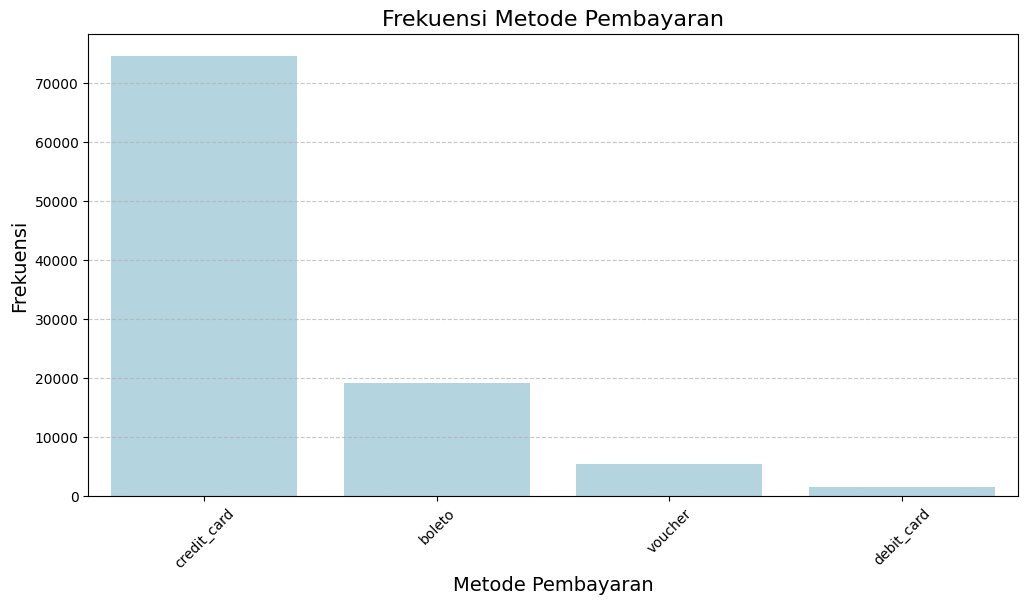

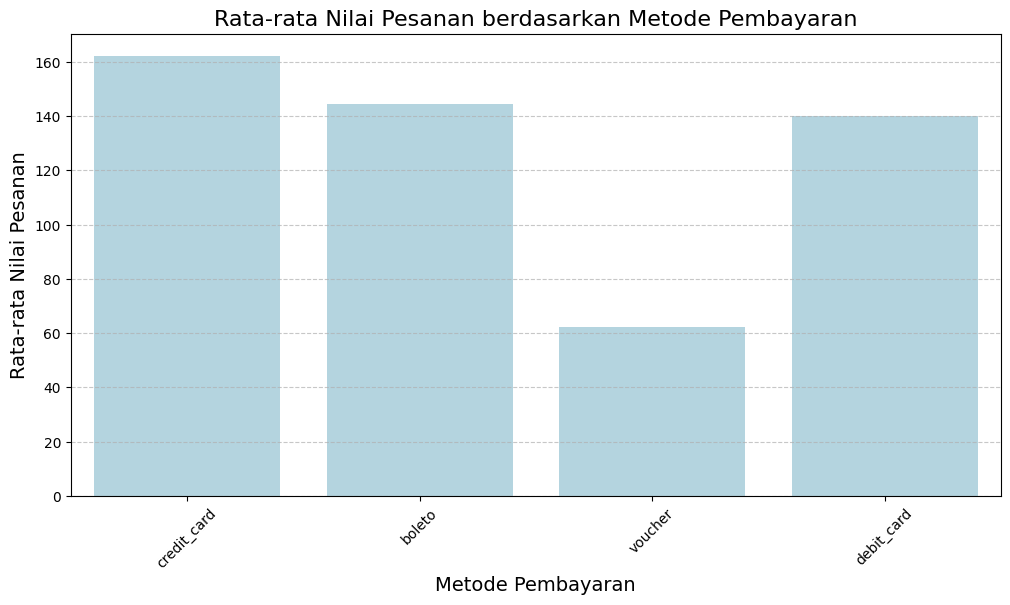

In [ ]:

# Mengambil ringkasan metode pembayaran
payment_summary = payment_summary.sort_values(by='frequency', ascending=False)

# Visualisasi Frekuensi Metode Pembayaran
plt.figure(figsize=(12, 6))

# Plot frekuensi metode pembayaran
sns.barplot(data=payment_summary, x='payment_type', y='frequency', color='lightblue')
plt.title('Frekuensi Metode Pembayaran', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi Rata-rata Nilai Pesanan berdasarkan Metode Pembayaran
plt.figure(figsize=(12, 6))

# Plot rata-rata nilai pesanan
sns.barplot(data=payment_summary, x='payment_type', y='average_order_value', color='lightblue')
plt.title('Rata-rata Nilai Pesanan berdasarkan Metode Pembayaran', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=14)
plt.ylabel('Rata-rata Nilai Pesanan', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Analisis metode pembayaran menunjukkan variasi dalam preferensi pelanggan saat melakukan transaksi.

Insight:

Metode pembayaran melalui kartu kredit mendominasi, diikuti oleh metode lainnya, menunjukkan kepercayaan pelanggan terhadap pembayaran digital.
Penyediaan lebih banyak pilihan metode pembayaran dapat meningkatkan konversi penjualan, terutama untuk pelanggan yang lebih memilih metode lain.
*   Metode pembayaran melalui kartu kredit mendominasi, diikuti oleh metode lainnya, menunjukkan kepercayaan pelanggan terhadap pembayaran digital.
*   Penyediaan lebih banyak pilihan metode pembayaran dapat meningkatkan konversi penjualan, terutama untuk pelanggan yang lebih memilih metode lain.


### Pertanyaan 3


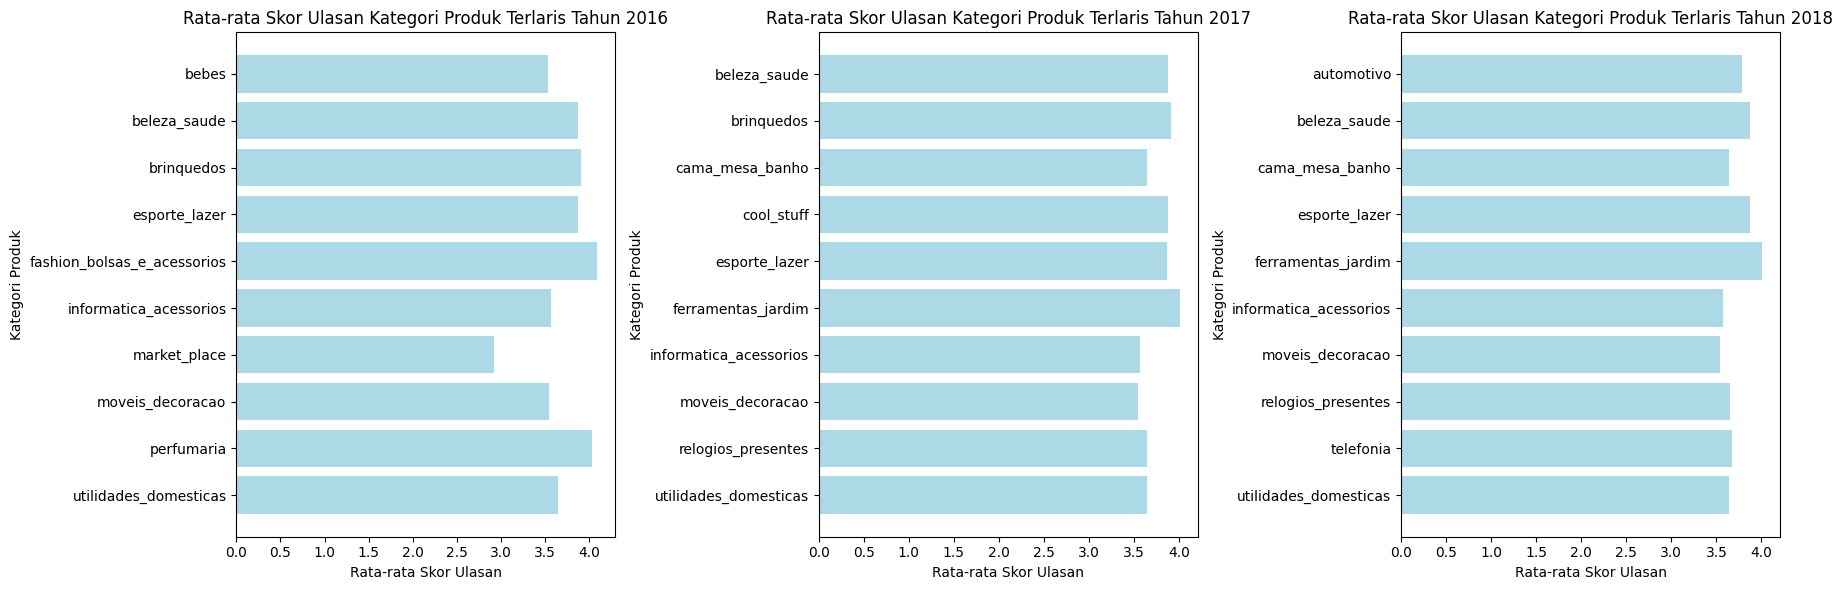

In [56]:

# Menyiapkan plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Menghitung dan menampilkan rata-rata skor ulasan per kategori produk untuk 10 produk terlaris setiap tahun
for idx, year in enumerate([2016, 2017, 2018]):
    # Memfilter data untuk kategori terlaris tahun ini
    top_categories = top_categories_per_year[year]
    filtered_reviews = reviews_merged_df[reviews_merged_df['product_category_name'].isin(top_categories)]

    # Menghitung rata-rata skor ulasan per kategori produk
    category_review_scores = filtered_reviews.groupby('product_category_name')['review_score'].mean().reset_index(name='average_review_score')

    # Membuat grafik batang
    axs[idx].barh(category_review_scores['product_category_name'], category_review_scores['average_review_score'], color='lightblue')
    axs[idx].set_title(f'Rata-rata Skor Ulasan Kategori Produk Terlaris Tahun {year}')
    axs[idx].set_xlabel('Rata-rata Skor Ulasan')
    axs[idx].set_ylabel('Kategori Produk')
    axs[idx].invert_yaxis()  # Membalikkan sumbu y untuk menampilkan kategori teratas di atas

plt.tight_layout()
plt.show()

Rata-rata skor ulasan menunjukkan bahwa sebagian besar produk menerima penilaian yang baik. Ini mengindikasikan kepuasan pelanggan yang tinggi terhadap produk yang ditawarkan.

Insight:
*   beberapa produk memiliki skor ulasan yang sangat tinggi, menunjukkan kualitas yang sangat baik.
*   Skor ulasan yang rendah pada produk tertentu mungkin menunjukkan masalah yang perlu diperbaiki untuk meningkatkan kepuasan pelanggan.



### Pertanyaan 4

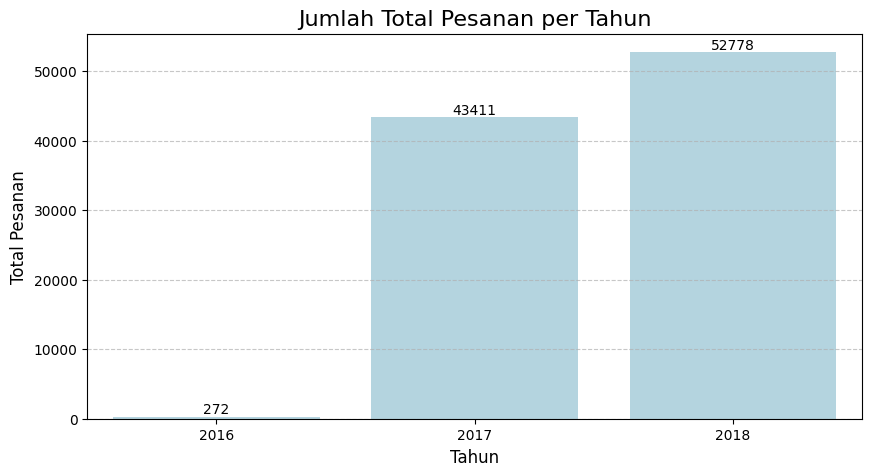

In [59]:
plt.figure(figsize=(10, 5))
# Menggunakan warna biru muda langsung
sns.barplot(x='year', y='total_orders', data=annual_orders, color='lightblue')

plt.title('Jumlah Total Pesanan per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Pesanan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan angka total pesanan di atas setiap batang
for i in range(len(annual_orders)):
    plt.text(i, annual_orders['total_orders'].iloc[i],
             str(annual_orders['total_orders'].iloc[i]),
             ha='center', va='bottom', fontsize=10)

plt.show()


Insight
-  Grafik menunjukkan tren pertumbuhan jumlah total pesanan dari tahun ke tahun. Jika batang menunjukkan peningkatan yang signifikan, ini menandakan bahwa bisnis mengalami peningkatan permintaan dan berhasil menarik lebih banyak pelanggan.

## Conclution
- Conclution pertanyaan 1
Kategori produk yang paling laris mengalami pergeseran setiap tahun, dengan variasi antara kategori yang berbeda, menunjukkan perubahan preferensi konsumen.
- Conclution pertanyaan 2
Metode pembayaran yang paling sering digunakan bervariasi, dan terdapat perbedaan signifikan dalam rata-rata nilai pesanan antara metode pembayaran, mengindikasikan preferensi pelanggan yang berbeda berdasarkan kenyamanan dan kepercayaan.
- Conclution pertanyaan 3
Rata-rata skor ulasan untuk kategori produk terlaris menunjukkan bahwa beberapa kategori mendapatkan feedback positif yang lebih tinggi, yang dapat memengaruhi penjualan di tahun berikutnya.
- Conclusion pertanyaan 4
 Jumlah total pesanan menunjukkan tren peningkatan yang signifikan setiap tahun, menandakan pertumbuhan permintaan dan popularitas platform dalam periode tersebut.